In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Import scikit libraries

In [7]:
# --- Model selection utilities ---
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# --- Preprocessing tools ---
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# --- Classification models ---
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
# --- Evaluation metrics ---
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    auc,
)

Inspect data

In [9]:
df = pd.read_csv('../../data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Define Features and Labels

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Standardize the features

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Define Parameter Grid

In [21]:
param_grid = {
    'n_neighbors': list(range(3, 22, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

Nested Cross Validation


In [28]:
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

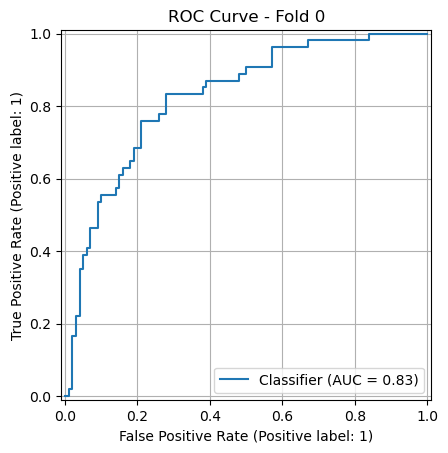

NameError: name 'ConfusionMatrixDisplay' is not defined

In [32]:
# Initialize results list
results = []

# Outer cross-validation loop
for fold, (train_idx, test_idx) in enumerate(cv_outer.split(X_scaled, y)):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Inner cross-validation with GridSearch
    grid_search = GridSearchCV(
        KNeighborsClassifier(),
        param_grid=param_grid,
        scoring='roc_auc',
        cv=cv_inner,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Predict on outer test fold
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Store performance metrics
    results.append({
        'fold': fold,
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    })

    # Plot ROC curve
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"ROC Curve - Fold {fold}")
    plt.grid()
    plt.show()

    # Plot confusion matrix
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.grid(False)
    plt.show()

Performance metrics

NameError: name 'cv_outer' is not defined

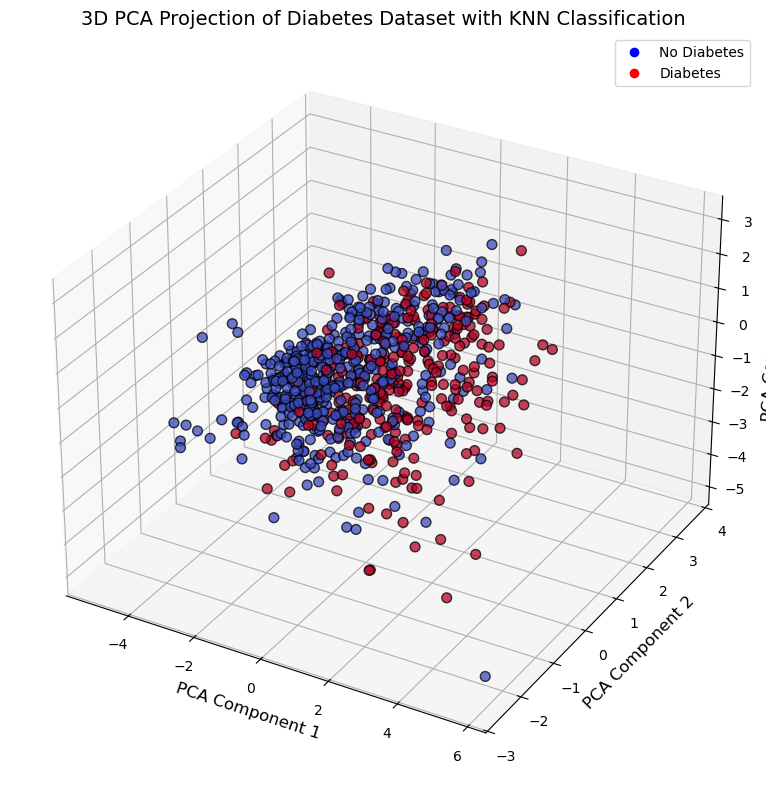

In [36]:
# Apply PCA to 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_3d, y)

# Plotting the 3D PCA-transformed data with KNN
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with outcome coloring
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=y, cmap='coolwarm', edgecolor='k', s=50, alpha=0.75)

# Axis labels and title
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)
ax.set_title('3D PCA Projection of Diabetes Dataset with KNN Classification', fontsize=14)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='No Diabetes', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Diabetes', markerfacecolor='red', markersize=8)
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()